In [13]:
import os
import sys
import csv
import logging
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.cm as cm

repo_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..',))
sys.path.append(repo_root)

from src import *

In [2]:
# Process saved files
process_directory(os.getcwd(), 'ex01.1')
process_directory(os.getcwd(), 'ex01.2')
process_directory(os.getcwd(), 'ex01.3')

In [55]:

def group_results_df(averages_df, compared_col, title, binary=False, metric_type='mean'):
    results = []

    for train_value, group in averages_df.groupby(['train']):
        base_values = group.iloc[0, :]

            
        if metric_type == 'mean':
            # Calculate mean against base, excluding 'train'
            values = calculate_column_means_against_base(group, compared_col)
         
        elif metric_type == 'proportion':
            # Calculate proportion against base, excluding 'train'
            if title in ['RMS']:  
                values = calculate_percentages_against_base(group, compared_col, flipped=True)
            else: 
                values = calculate_percentages_against_base(group, compared_col)
        
        values['train'] = base_values['train']  # Keep the original train value
        results.append(values)

    if binary:
        return pd.DataFrame(results)[['Spring_Rank', 'Page_Rank', 'Point_Wise', 'train']]
    else:
        return pd.DataFrame(results)

def plot_results(ax, df, metric_type, title):
    train_size = df['train']
    colormap = plt.colormaps.get_cmap('cividis')
    colors = colormap(np.linspace(0, 1, len(df.columns) - 1))
    
    for i, column in enumerate(df.columns):
        if column != 'train':
            ax.plot(train_size, df[column], label=column, marker='o' if metric_type == 'proportion' else 's', color=colors[i-1])
    
    ax.set_xscale('log')
    ax.set_xlabel('Train Size')
    ax.set_ylabel('Proportion' if metric_type == 'proportion' else 'Mean')
    ax.set_title(title)
    ax.legend()

def visualize_results(base_path, compared_col, metric_type='mean', binary=False):
    # Read the summary CSV files
  
    log_likelihood_df = pd.read_csv(os.path.join(base_path,'log_likelihood_summary.csv'))
    leadership_log_likelihood_df = pd.read_csv(os.path.join(base_path,'leadership_log_likelihood_summary.csv'))
    rms_df = pd.read_csv(os.path.join(base_path,'rms_summary.csv'))
    rho_df = pd.read_csv(os.path.join(base_path,'rho_summary.csv'))
    tau_df = pd.read_csv(os.path.join(base_path, 'tau_summary.csv'))

    # List of dataframes and their titles
    dataframes = [
        (log_likelihood_df, 'Log Likelihood'),
        (leadership_log_likelihood_df, 'Leadership Log Likelihood'),
        (rms_df, 'RMS'),
        (rho_df, 'Rho'),
        (tau_df, 'Tau')
    ]

    fig, axes = plt.subplots(1, 5, figsize=(50, 10), sharey=True)
    axes = axes.flatten()

    for i, (df, title) in enumerate(dataframes):
        grouped_df = group_results_df(df, compared_col, title, binary, metric_type)
        plot_results(axes[i], grouped_df, metric_type, title)

    plt.tight_layout()
    plt.show()


# Standard 

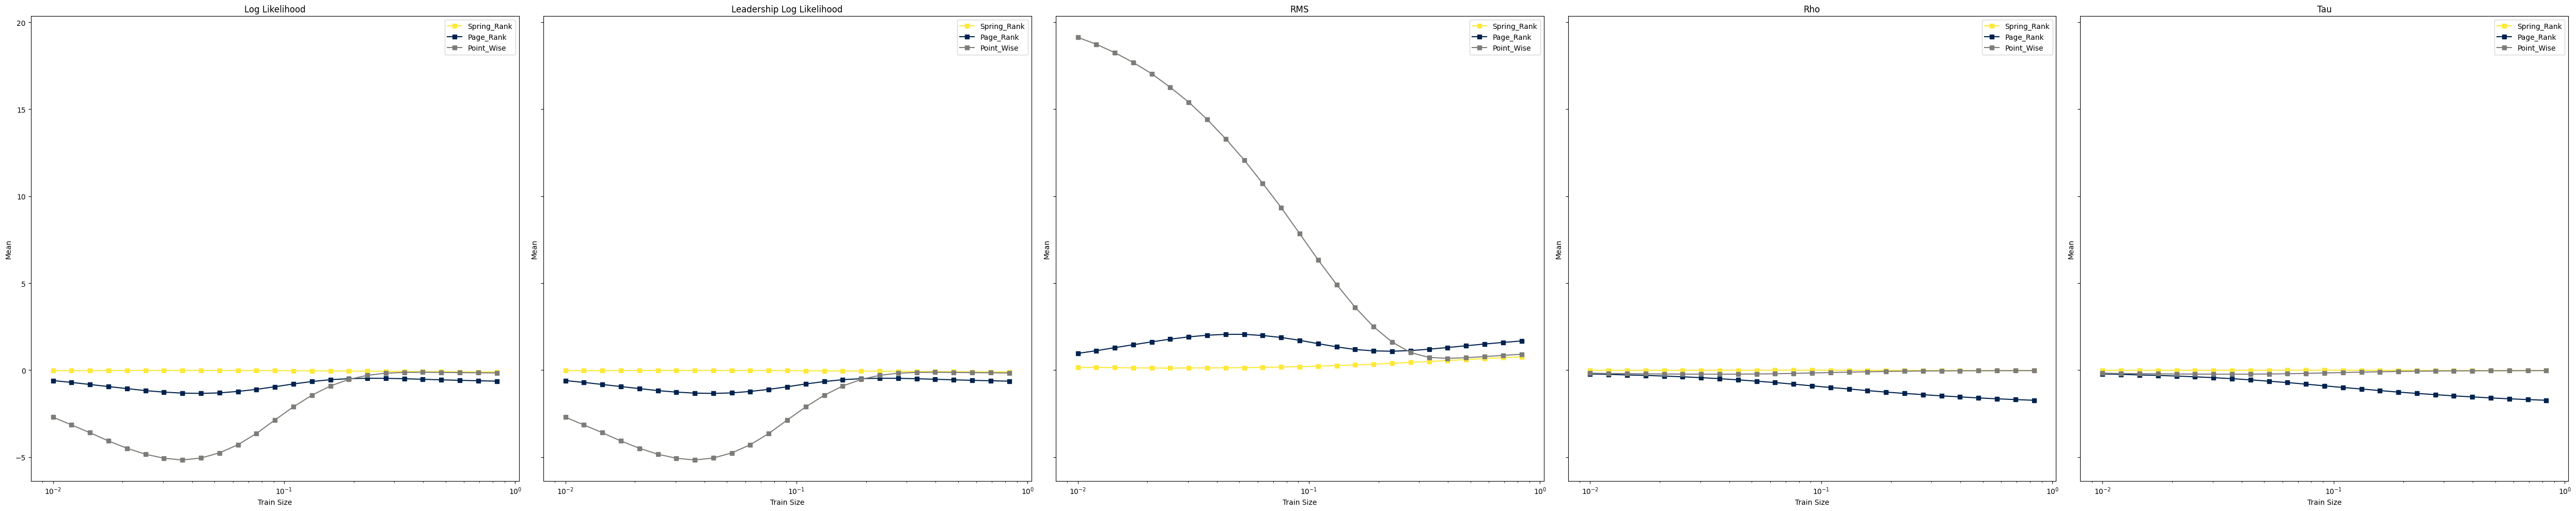

In [56]:
path = os.path.join(os.getcwd(), 'results', 'ex01.1')
visualize_results(path, compared_col='BT', metric_type='mean', binary=True )




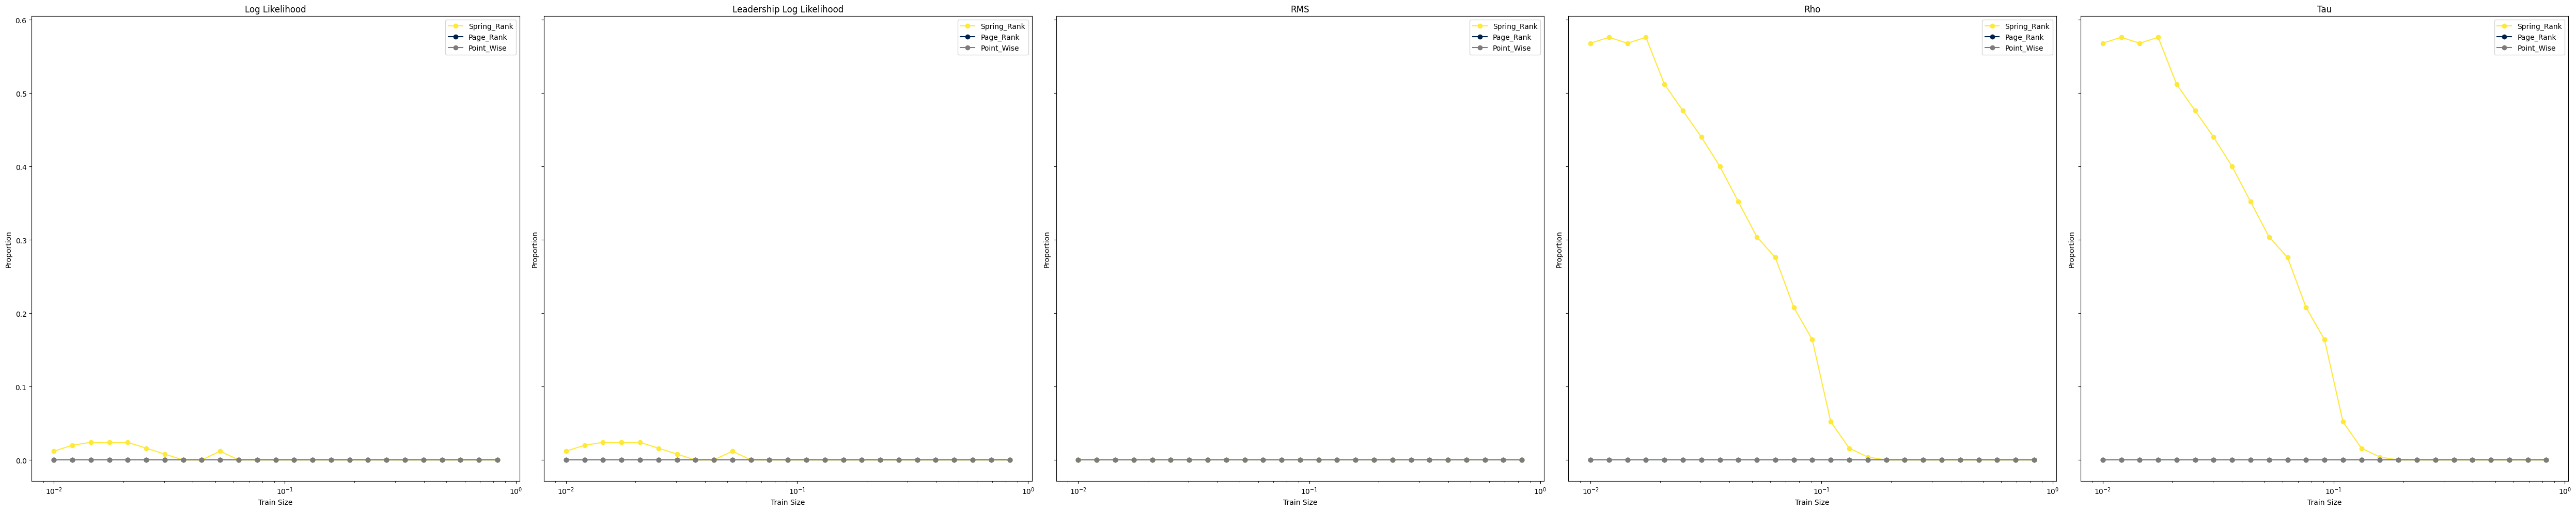

In [57]:
visualize_results(path, compared_col='BT', metric_type='proportion', binary=True )

# Higher Order 

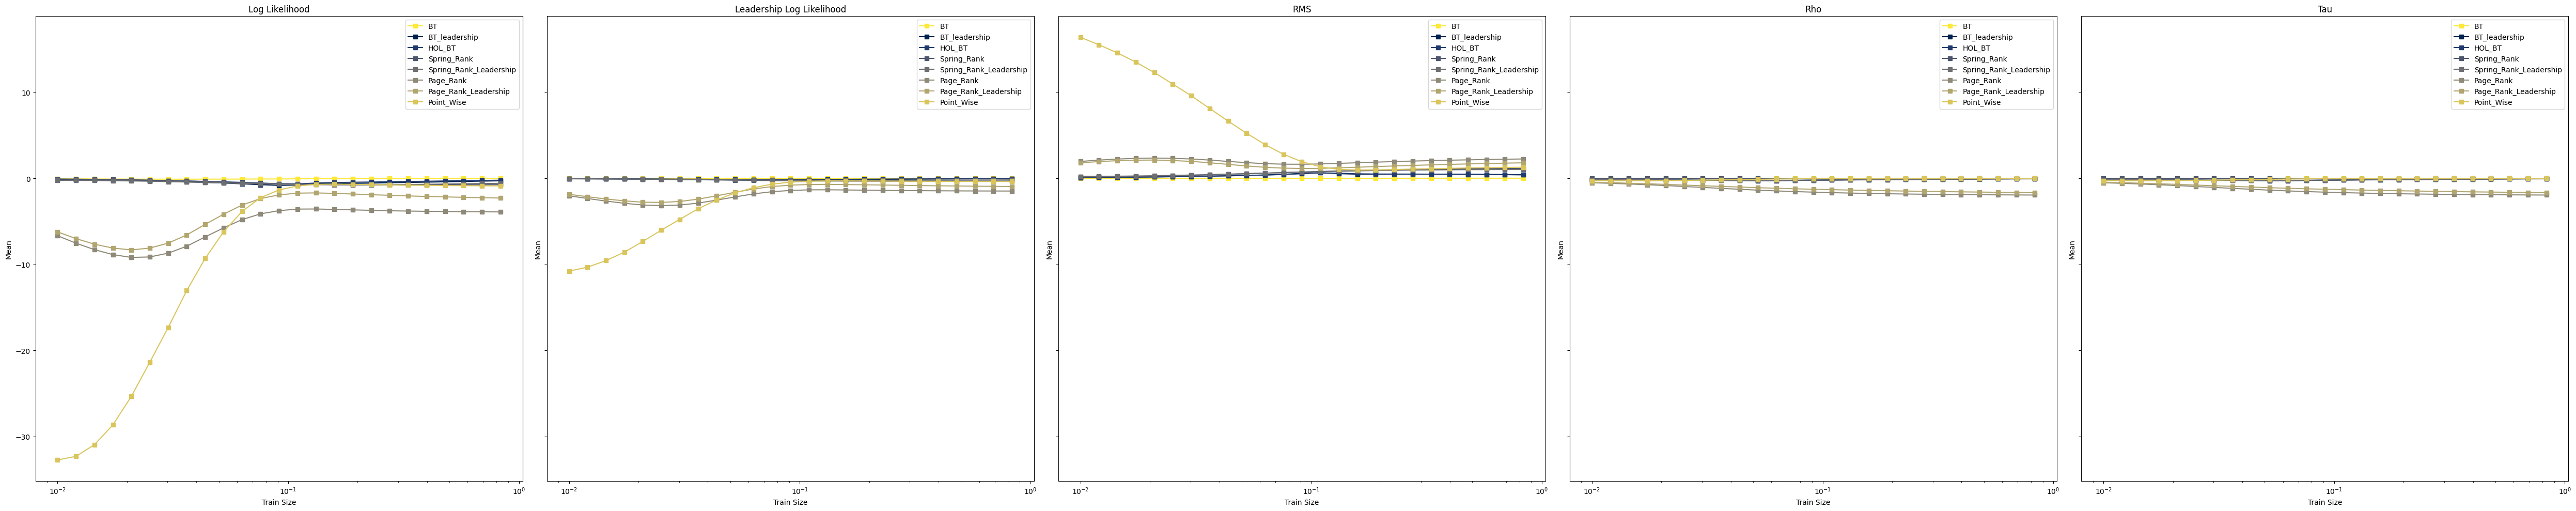

In [58]:
path = os.path.join(os.getcwd(), 'results', 'ex01.2')
visualize_results(path, compared_col='HO_BT', metric_type='mean')




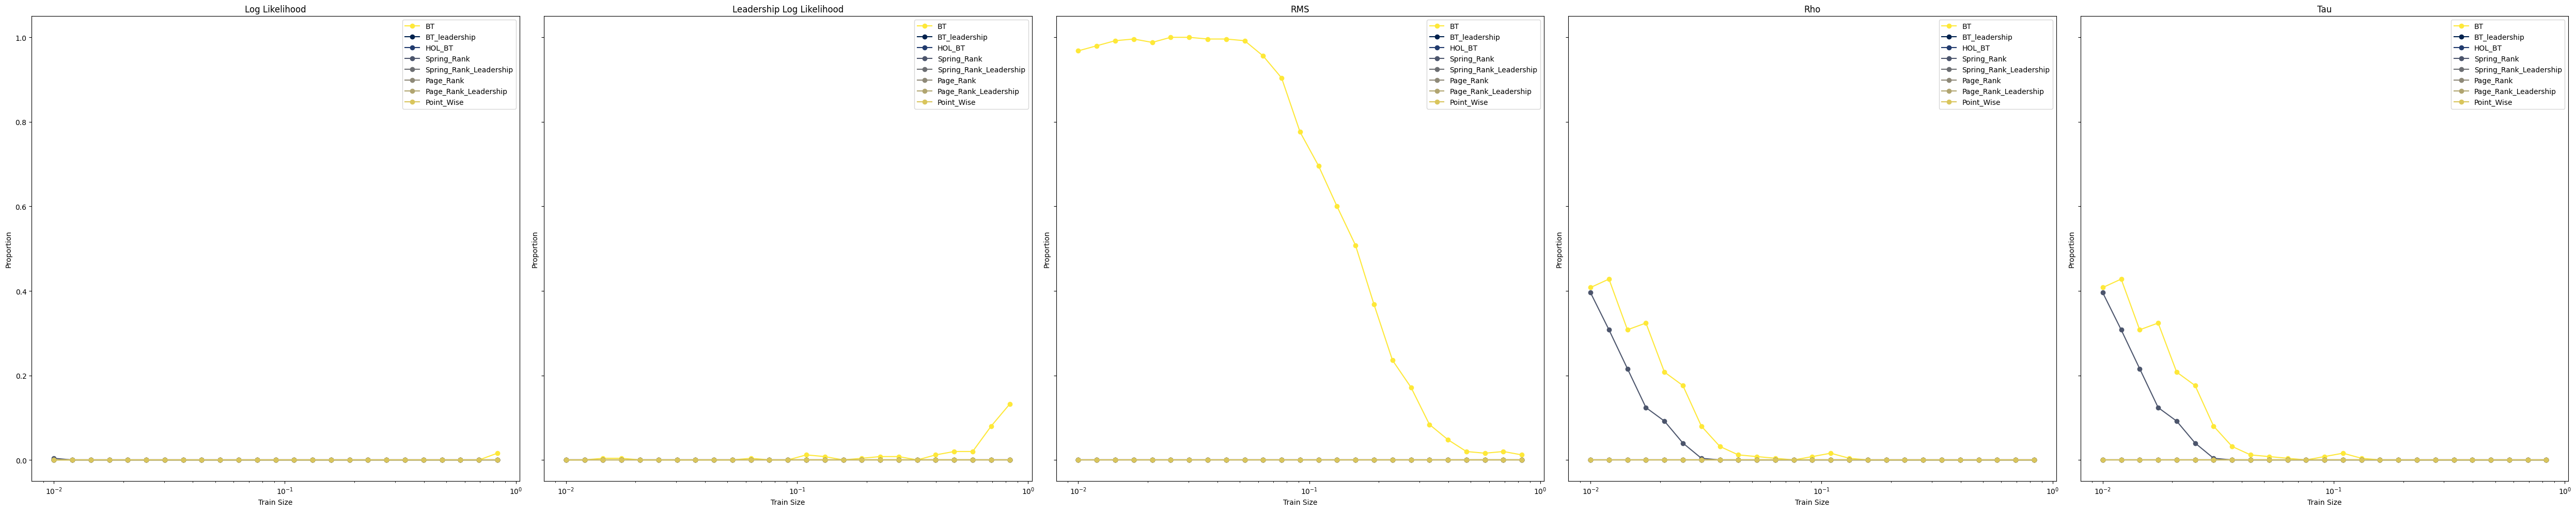

In [59]:
path = os.path.join(os.getcwd(), 'results', 'ex01.2')
visualize_results(path, compared_col='HO_BT', metric_type='proportion')

# Higher Order Leadership

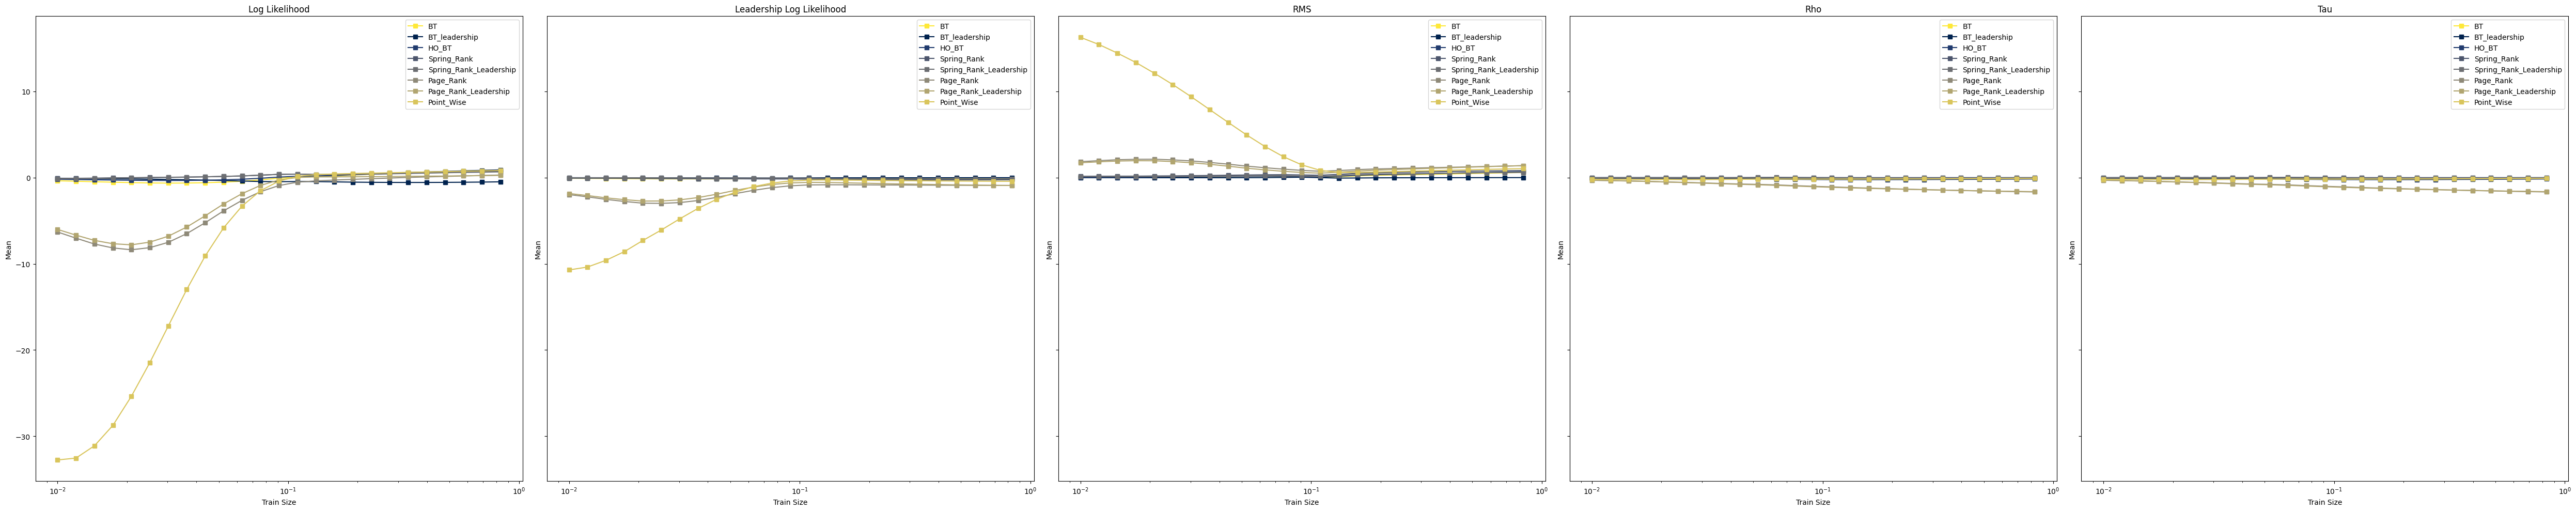

In [60]:
path = os.path.join(os.getcwd(), 'results', 'ex01.3')
visualize_results(path, compared_col='HOL_BT', metric_type='mean')


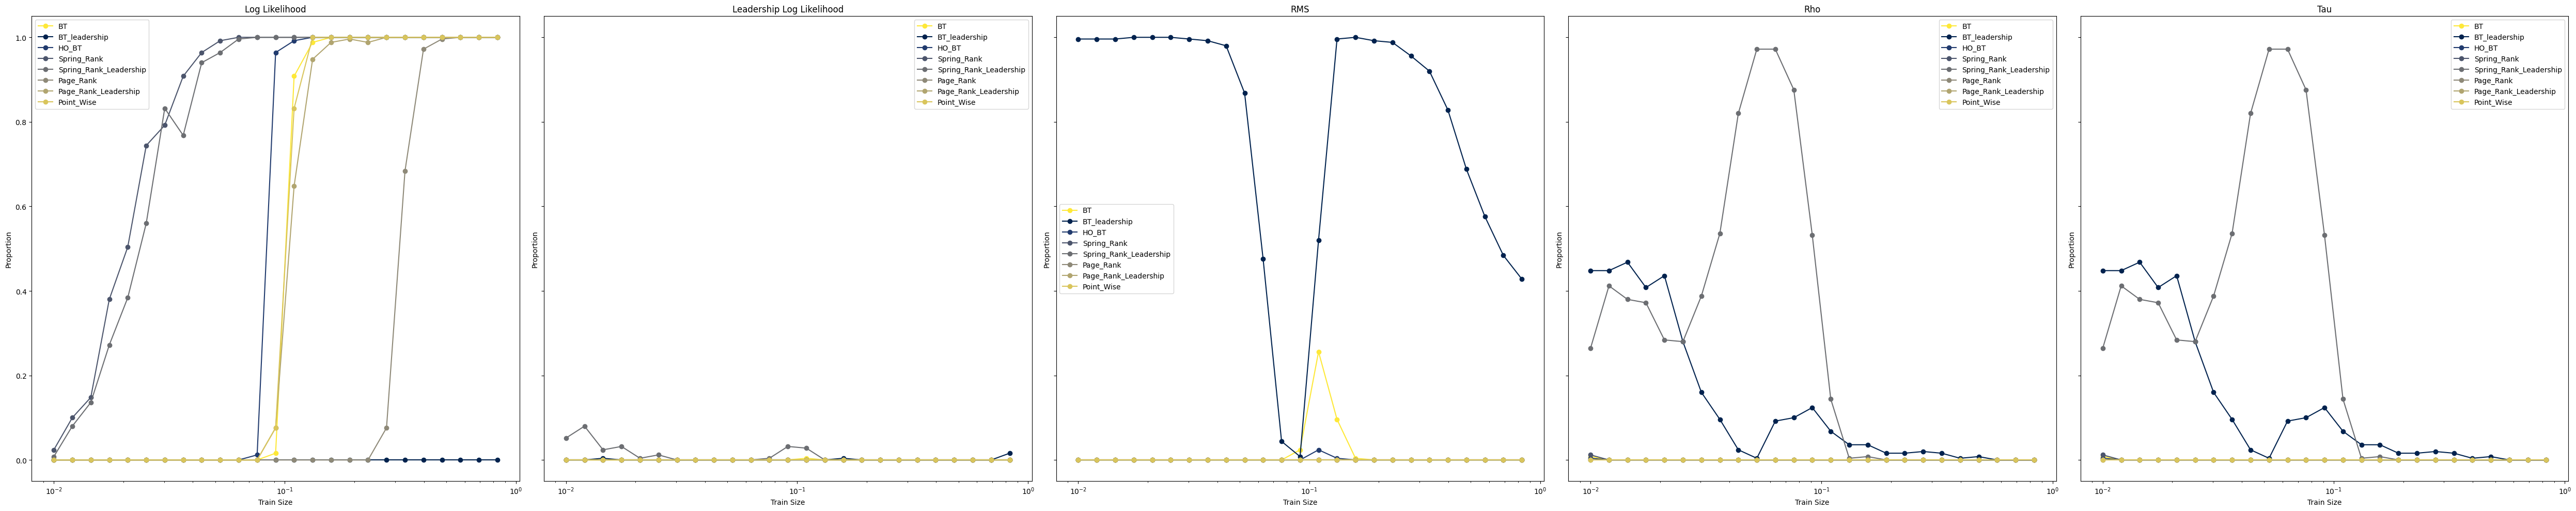

In [61]:
path = os.path.join(os.getcwd(), 'results', 'ex01.3')
visualize_results(path, compared_col='HOL_BT', metric_type='proportion')